In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# for coloring points and clusters
colorMap = plt.get_cmap('Accent')

In [23]:
# read points from file
filename = "kmpoints_uniform.txt"
inFile = open(filename, 'r')

In [24]:
N = int(inFile.readline())
points = np.zeros([N, 2])
for i in range(N):
    pt = inFile.readline()
    pt = pt.split()
    points[i, 0] = float(pt[0]) #x
    points[i, 1] = float(pt[1]) #y

In [25]:
best_K = None
best_silhouette_score = -1
#kmeans iterations
nrMaxIterations = 10

In [26]:
# initialize distances from each point to corresponding centroid
dist = np.zeros(N)

# ids of clusters for each point: 
# clusterID[i] = -1 means point i doesn't belong to any cluster
# clusterID[i] = j means point i belongs to cluster j, j=[0..K-1]
clusterID = np.full(N, -1)

In [27]:
def silhouette_score(map_points, cluster_ids):
    silhouette_scores = []
    for i in range(len(map_points)):
        point = map_points[i]
        cluster_id = cluster_ids[i]
        
        # Calculate average distance within the same cluster (a(i))
        intra_cluster_distances = []
        min_inter_cluster_distance = float('inf')
        for j in range(len(map_points)):
            if i != j and cluster_ids[j] == cluster_id:
                intra_cluster_distances.append(np.linalg.norm(point - map_points[j]))
            if cluster_ids[j] != cluster_id:
                inter_cluster_distance = np.mean(np.linalg.norm(point - map_points[cluster_ids == cluster_ids[j]], axis=1))
                if inter_cluster_distance < min_inter_cluster_distance:
                    min_inter_cluster_distance = inter_cluster_distance
                    
        if intra_cluster_distances:
            a_i = np.mean(intra_cluster_distances)
        else:
            a_i = -1
        b_i = min_inter_cluster_distance
        
        # Calculate silhouette score for the point
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) != 0 else 0
        silhouette_scores.append(s_i)
    
    # Compute the mean silhouette score
    mean_silhouette_score = np.mean(silhouette_scores)
    
    return mean_silhouette_score

In [28]:
# Loop through different values of K and compute silhouette score
for k in range(2, 11):  # Try K from 2 to 10
    centroids = np.zeros([k, 2])
    clusterID = np.random.randint(0, k, N)
    for iteration in range(nrMaxIterations):
        # Compute new centroids
        new_centroids = np.zeros((k, 2))
        cluster_counts = np.zeros(k)

        for i in range(N):
            cluster_index = clusterID[i]
            # sum points
            new_centroids[cluster_index] += points[i]
            # num of groups
            cluster_counts[cluster_index] += 1
        for j in range(k):
            if cluster_counts[j] > 0:
                # calculate average
                new_centroids[j] /= cluster_counts[j]

        # Break when centroid positions don't change significantly from previous values
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids.copy()

        # Assign points to clusters
        for i in range(N):
            distances = np.linalg.norm(points[i] - centroids, axis=1)
            clusterID[i] = np.argmin(distances)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(points, clusterID)
    print(f"For K = {k}, Silhouette Score = {silhouette_avg}")
    
    # Update best K if necessary
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_K = k

print(f"The best value of K is: {best_K}")

For K = 2, Silhouette Score = 0.37547026970311576
For K = 3, Silhouette Score = 0.3802789496186633
For K = 4, Silhouette Score = 0.4282786643973278
For K = 5, Silhouette Score = 0.3840092649481604
For K = 6, Silhouette Score = 0.35302675103701203
For K = 7, Silhouette Score = 0.3828415344061581
For K = 8, Silhouette Score = 0.35721480889437573
For K = 9, Silhouette Score = 0.3696761193802836
For K = 10, Silhouette Score = 0.35485735013844516
The best value of K is: 4


In [34]:
# randomly assign points to clusters
clusterID = np.random.randint(0, best_K, N)

centroids = np.zeros([best_K, 2]) # positions of centroids

In [35]:
# generate random colors, one for each cluster
clusterColor = colorMap(np.array(range(best_K))/best_K)

In [36]:
for iteration in range(nrMaxIterations):
    # compute new centroids
    new_centroids = np.zeros((best_K, 2))
    cluster_counts = np.zeros(best_K)

    for i in range(N):
        cluster_index = clusterID[i]
        # sum points
        new_centroids[cluster_index] += points[i]
        # num of groups
        cluster_counts[cluster_index] += 1
    for j in range(best_K):
        if cluster_counts[j] > 0:
            # calculate average
            new_centroids[j] /= cluster_counts[j]

    # break when centroid positions don't change significantly from previous values
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids.copy()

    # assign points to clusters
    for i in range(N):
        distances = np.linalg.norm(points[i] - centroids, axis=1)
        clusterID[i] = np.argmin(distances)

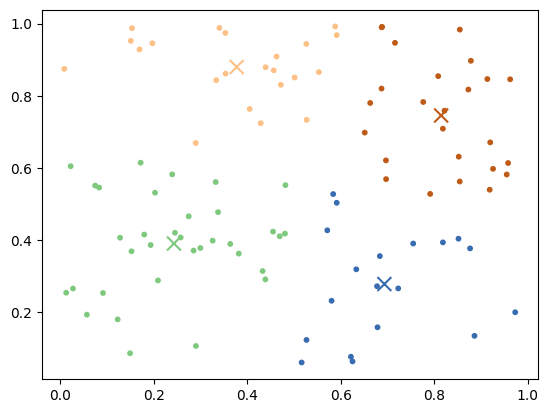

In [37]:
# plot points, centroids
pointColors = np.array(clusterColor[clusterID])
plt.scatter(points[:,0], points[:,1], color = pointColors, marker = 'o', s = 10)
centroidColors = np.array(clusterColor[range(best_K)])
plt.scatter(centroids[:, 0], centroids[:, 1], color = centroidColors, marker = 'x', s = 100)
plt.show() 